In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn import preprocessing

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Assigning path
path = r'C:\Users\Shruthi\Desktop\immo_data.csv'

In [4]:
# Importing data
df= pd.read_csv(os.path.join(path, 'immo_data.csv'))

In [5]:
df.shape

(268850, 49)

In [6]:
df.head()

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  \
0        4.62                10.0  ...             Dortmund   
1        3.47                10.0  ...    Rhein_Pfalz_Kreis   
2        2.72                 2.4  ...              Dresden   
3        1.53                40.0  ...  Mittelsachsen_Kreis   
4        2.46                 NaN  ...               Bremen   

                       regio3  \
0                     Schüren   
1              Böhl_Iggelheim   
2  Äußere_Neustadt_Antonstadt   
3                    Freiberg   
4           Neu_Schwachhausen   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   
1  Alles neu macht der Mai – so kann es auch für ...   
2  Der Neubau entsteht im Herzen der Dresdner Neu...   
3  Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4  Es handelt sich hier um ein saniertes Mehrfami...   

                                          facilities heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...          NaN   
1                                                NaN          NaN   
2  * 9 m² Balkon\n* Bad mit bodengleicher Dusche,...          NaN   
3                                                NaN        87.23   
4  Diese Wohnung wurde neu saniert und ist wie fo...          NaN   

   energyEfficiencyClass lastRefurbish  electricityBasePrice  \
0                    NaN           NaN                   NaN   
1                    NaN        2019.0                   NaN   
2                    NaN           NaN                   NaN   
3                    NaN           NaN                   NaN   
4                    NaN           NaN                   NaN   

   electricityKwhPrice   date  
0                  NaN  May19  
1                  NaN  May19  
2                  NaN  Oct19  
3                  NaN  May19  
4                  NaN  Feb20  

[5 rows x 49 columns]

In [7]:
# Renaming columns
df1= df.rename(columns = {'regio1': 'State', 'serviceCharge': 'Service_charge', 'pricetrend': 'Price_trend', 'telekomUploadSpeed':'Internet_speed', 'totalRent':'Total_rent', 'yearConstructed':'Construction_year',  'baseRent':'Base_rent', 'livingSpace':'Size',  'noRooms':'No_of_Rooms', 'regio3':'City', 'heatingCosts':'Heating_costs', 'date': 'Date_posted'})

In [8]:
# Make a df with all required variables
df2 = df1[['Service_charge', 'Price_trend', 'Internet_speed','Base_rent', 'Total_rent', 'Construction_year', 'Size', 'No_of_Rooms', 'Heating_costs']]

In [9]:
df2.head()

Service_charge  Price_trend  Internet_speed  Base_rent  Total_rent  \
0          245.00         4.62            10.0      595.0       840.0   
1          134.00         3.47            10.0      800.0         NaN   
2          255.00         2.72             2.4      965.0      1300.0   
3           58.15         1.53            40.0      343.0         NaN   
4          138.00         2.46             NaN      765.0       903.0   

   Construction_year   Size  No_of_Rooms  Heating_costs  
0             1965.0  86.00          4.0            NaN  
1             1871.0  89.00          3.0            NaN  
2             2019.0  83.80          3.0            NaN  
3             1964.0  58.15          3.0          87.23  
4             1950.0  84.97          3.0            NaN

In [10]:
# Check for missing values
df2.isnull().sum()

Service_charge         6909
Price_trend            1832
Internet_speed        33358
Base_rent                 0
Total_rent            40517
Construction_year     57045
Size                      0
No_of_Rooms               0
Heating_costs        183332
dtype: int64

In [11]:
# Impute missing values with mean
df2['Price_trend'].fillna(df2['Price_trend'].mean(), inplace=True)
df2['Total_rent'].fillna(df2['Total_rent'].mean(), inplace=True)
df2['Construction_year'].fillna(df2['Construction_year'].mean(), inplace=True)
df2['Service_charge'].fillna(df2['Service_charge'].mean(), inplace=True)
df2['Internet_speed'].fillna(df2['Internet_speed'].mean(), inplace=True)
df2['Heating_costs'].fillna(df2['Heating_costs'].mean(), inplace=True)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_3432\2678150940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price_trend'].fillna(df2['Price_trend'].mean(), inplace=True)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_3432\2678150940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_rent'].fillna(df2['Total_rent'].mean(), inplace=True)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_3432\2678150940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [12]:
# Last check for NaN
df2.isnull().sum()

Service_charge       0
Price_trend          0
Internet_speed       0
Base_rent            0
Total_rent           0
Construction_year    0
Size                 0
No_of_Rooms          0
Heating_costs        0
dtype: int64

Elbow technique

In [13]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 
score

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

[-354910761793219.25,
 -106827377664285.64,
 -6840907808297.388,
 -1363178919840.1348,
 -531625210470.28284,
 -296864771561.15845,
 -222129442295.96326,
 -166892786870.44006,
 -138346516995.2109]

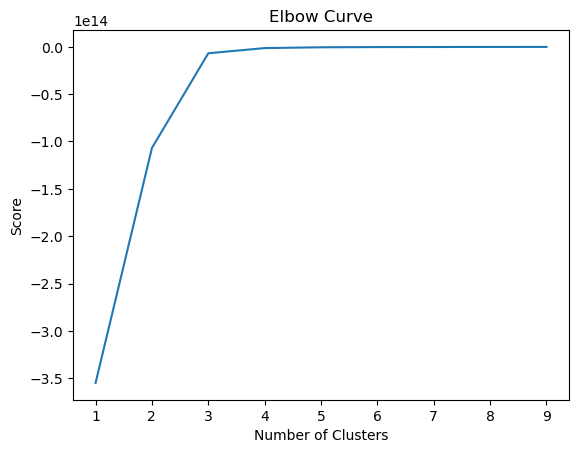

In [15]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's alarge jump at 3, so I chose the number of clusters as 3.

K-means clustering

In [16]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [17]:
# Fit the k-means object to the data.
kmeans.fit(df2)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_3432\3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [19]:
df2.head()

Service_charge  Price_trend  Internet_speed  Base_rent   Total_rent  \
0          245.00         4.62       10.000000      595.0   840.000000   
1          134.00         3.47       10.000000      800.0   901.331522   
2          255.00         2.72        2.400000      965.0  1300.000000   
3           58.15         1.53       40.000000      343.0   901.331522   
4          138.00         2.46       28.804928      765.0   903.000000   

   Construction_year   Size  No_of_Rooms  Heating_costs  clusters  
0             1965.0  86.00          4.0      76.990866         0  
1             1871.0  89.00          3.0      76.990866         0  
2             2019.0  83.80          3.0      76.990866         0  
3             1964.0  58.15          3.0      87.230000         0  
4             1950.0  84.97          3.0      76.990866         0

In [20]:
df2['clusters'].value_counts()

0    268848
1         1
2         1
Name: clusters, dtype: int64

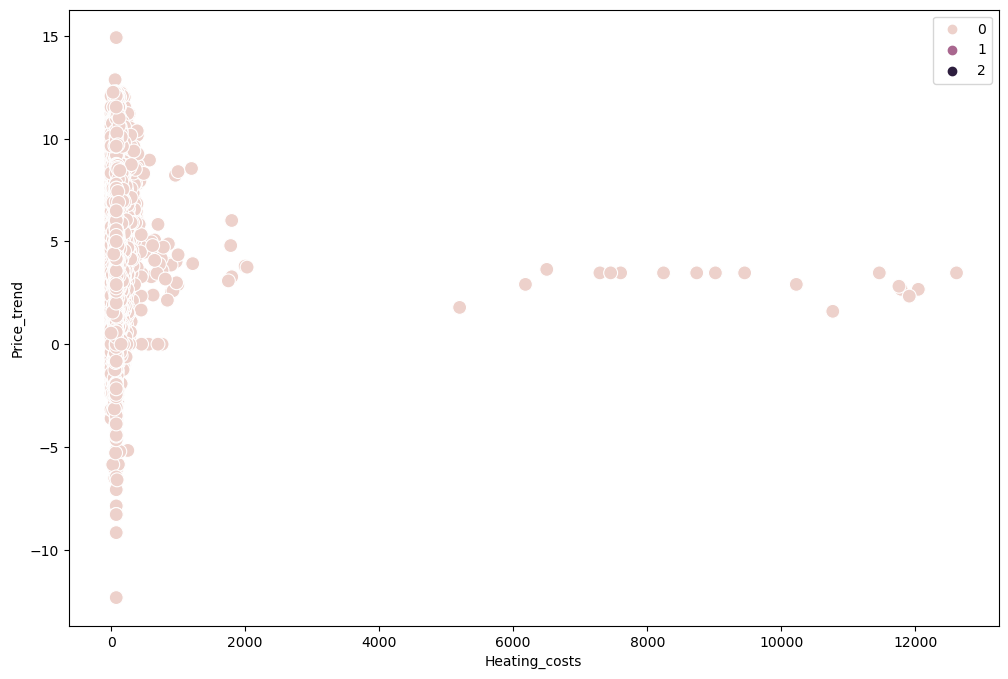

In [21]:
# Plot the clusters for the "Price trend" and "Heating costs" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Heating_costs'], y=df2['Price_trend'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Heating_costs') 
plt.ylabel('Price_trend') 
plt.show()

Here we can see 1 clusters with code 0 represent the lower heating costs and higher price trend.

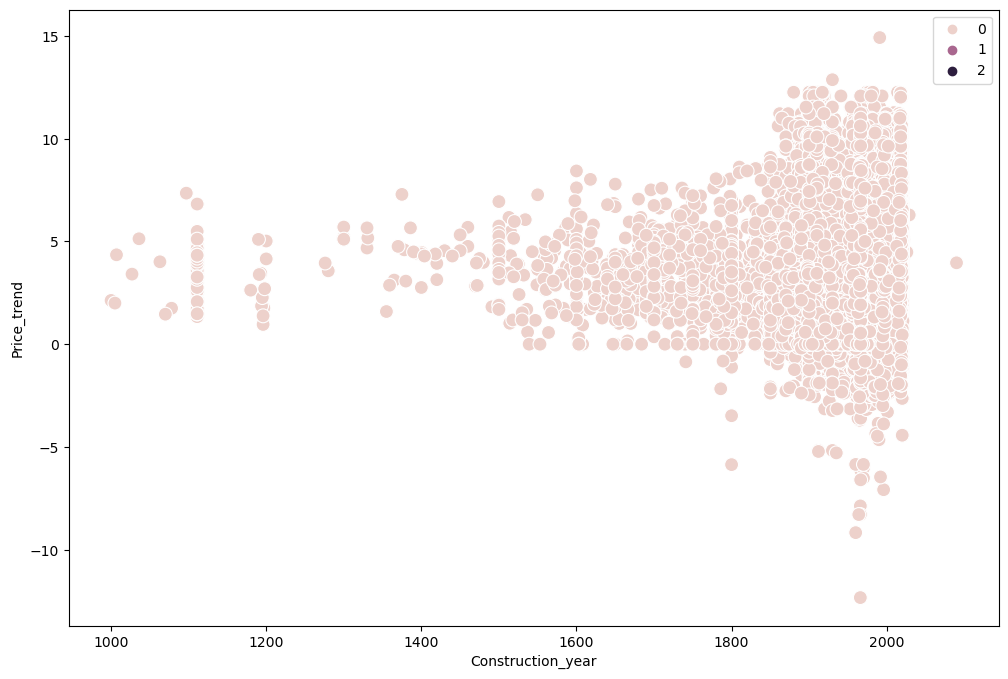

In [23]:
# Plot the clusters for the "Construction_year" and "Price trend" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Construction_year'], y=df2['Price_trend'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Construction_year') 
plt.ylabel('Price_trend') 
plt.show()

Here we can see a huge cluster which represents that as the contruction year is new, the price trend remains high.

In [25]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_3432\3156325668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'


In [26]:
df2.groupby('cluster').agg({'Construction_year':['mean', 'median'],  
                         'Heating_costs':['mean', 'median'],
                          'Price_trend':['mean', 'median']})

Construction_year             Heating_costs             \
                         mean      median          mean     median   
cluster                                                              
dark purple       1966.400590  1966.40059     76.990866  76.990866   
pink              1966.400413  1966.40059     76.990866  76.990866   
purple            2014.000000  2014.00000     76.990866  76.990866   

            Price_trend            
                   mean    median  
cluster                            
dark purple    4.410000  4.410000  
pink           3.388992  3.389001  
purple         4.660000  4.660000

Based on stats and the grpahs, we can dig deeper into the heating costs and price trend as wee see all the clusters have more or less same values of mean and median. This seems to be more reasoning to dig deeper into these variables.